In [1]:
# Using Saliency maps to recognize the most important features the model looks for in an image
# In the best interst of time, here i have used a model that i have created using Google Teachable machine to classify between different types of hair
# Required tensorflow version 2.12.0

In [2]:
!pip install tensorflow==2.12.0

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

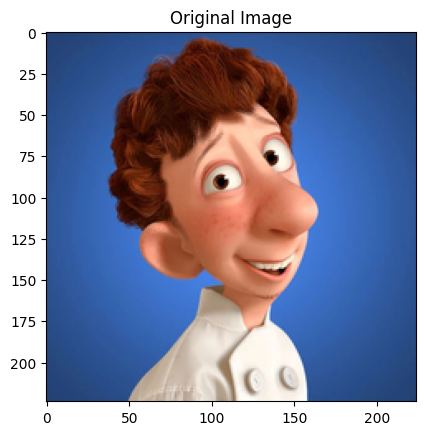

In [4]:
# Load the model and labels
model = load_model("keras_model.h5", compile=False)
class_names = open("labels.txt", "r").readlines()

# Prepare the image
image = Image.open("/content/remi.png").convert("RGB")
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
data[0] = normalized_image_array

# Displaying the image
plt.imshow(image_array)
plt.title("Original Image")
plt.show()

In [5]:
# Create a TensorFlow GradientTape context to compute gradients
input_image = tf.convert_to_tensor(data)
with tf.GradientTape() as tape:
    tape.watch(input_image)
    predictions = model(input_image)
    predicted_class = np.argmax(predictions[0])

    # Get the output of the model for the predicted class
    class_output = predictions[:, predicted_class]

# Compute the gradient of the predicted class with respect to the input image
grads = tape.gradient(class_output, input_image)

# Take the maximum along the color channels
grads = tf.reduce_max(grads, axis=-1)[0]

# Normalize the gradients
grads = (grads - tf.reduce_min(grads)) / (tf.reduce_max(grads) - tf.reduce_min(grads))

# Get the confidence score
confidence_score = predictions[0][predicted_class]

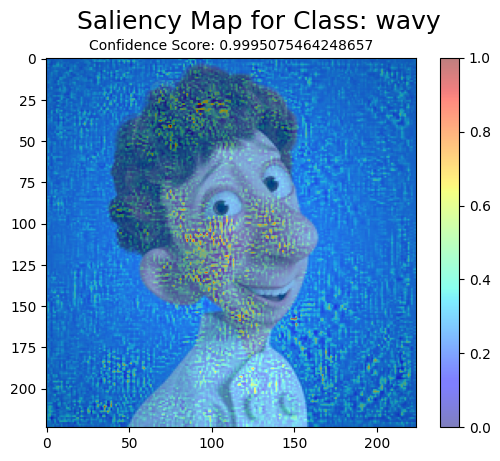

In [6]:
# Visualize the saliency map
plt.imshow(image_array)
plt.imshow(grads, cmap='jet', alpha=0.5)  # Overlay the gradients on the original image
plt.colorbar()
plt.suptitle(f'Saliency Map for Class: {class_names[predicted_class][2:].strip()}', fontsize=18)
plt.title(f'Confidence Score: {confidence_score}', fontsize=10)
plt.show()